In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv("/content/train.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [4]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [8]:
train.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [10]:
train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,3.262774,5.299270,5.080292,1.416058,1.386861,1.941606,1.036496,1.941606,4.905109,4.547445,2.270073,2.226277,3.423358,1.372263,1.211679,1.470803,1.145985,3.222628,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,1.910767,1.941668,1.036527,2.729583,2.398677,3.505807,2.030679,3.300549,5.604467,3.708041,2.052630,1.230690,4.559609,2.304112,2.133179,2.612024,2.067039,2.308806,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,2.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,2.000000,2.000000,3.000000,1.000000,4.000000,5.000000,5.000000,3.000000,3.000000,5.000000,2.000000,2.000000,2.500000,2.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.500000,15.000000,10.000000,15.000000,15.000000,12.000000,25.000000,15.000000,15.000000,5.000000,25.000000,10.000000,10.000000,12.500000,12.500000,12.500000,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [12]:
train = train.drop('Id', axis=1)
len(train.columns)

42

In [14]:
train['Open Date'] = pd.to_datetime(train['Open Date'])
train.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [15]:
train['years'] = [x.year for x in train['Open Date']]

In [16]:
train.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Year
0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,1999
1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,2008
2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,2013
3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,2012
4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,2009


In [17]:
train=train.drop('Open Date', axis=1)

In [20]:
len(train.columns)

42

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

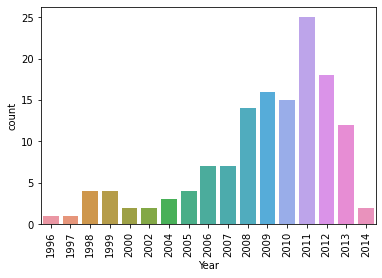

In [25]:
sns.countplot(train['Year'])
plt.xticks(rotation=90)

In [31]:
train.groupby('Year')['revenue'].mean()

Year
1996    3.903884e+06
1997    4.286645e+06
1998    4.251905e+06
1999    7.329030e+06
2000    1.359602e+07
2002    4.991022e+06
2004    3.482435e+06
2005    6.611118e+06
2006    4.203972e+06
2007    5.079333e+06
2008    4.876962e+06
2009    4.652457e+06
2010    4.383878e+06
2011    4.147879e+06
2012    3.837859e+06
2013    2.532287e+06
2014    2.464944e+06
Name: revenue, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

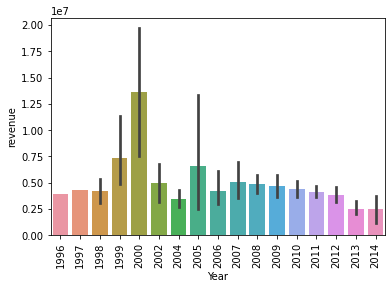

In [33]:
sns.barplot('Year', 'revenue', data = train)
plt.xticks(rotation = 90)

In [37]:
train['Type'].value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [38]:
dict = {'FC':0, 'IL':1, 'DT':2}
train['Type'] = train['Type'].map(dict)

In [39]:
train['Type'].value_counts()

0    76
1    60
2     1
Name: Type, dtype: int64

In [40]:
train['City Group'].value_counts()

Big Cities    78
Other         59
Name: City Group, dtype: int64

In [41]:
cg = {'Big Cities':0, 'Other':1}
train['City Group'] = train['City Group'].map(cg)

In [43]:
cities = train['City'].value_counts()

In [44]:
type(cities)

pandas.core.series.Series

In [45]:
cities.index

Index(['İstanbul', 'Ankara', 'İzmir', 'Samsun', 'Bursa', 'Sakarya', 'Antalya',
       'Diyarbakır', 'Kayseri', 'Tekirdağ', 'Eskişehir', 'Adana', 'Aydın',
       'Muğla', 'Konya', 'Trabzon', 'Kastamonu', 'Karabük', 'Kütahya', 'Uşak',
       'Kocaeli', 'Balıkesir', 'Isparta', 'Osmaniye', 'Elazığ', 'Amasya',
       'Afyonkarahisar', 'Kırklareli', 'Denizli', 'Tokat', 'Şanlıurfa',
       'Edirne', 'Bolu', 'Gaziantep'],
      dtype='object')

In [53]:
new_cities = {}
for i, j in enumerate(cities):
  new_cities.update({j:i})
  print(new_cities)

{50: 0}
{50: 0, 19: 1}
{50: 0, 19: 1, 9: 2}
{50: 0, 19: 1, 9: 2, 5: 3}
{50: 0, 19: 1, 9: 2, 5: 4}
{50: 0, 19: 1, 9: 2, 5: 4, 4: 5}
{50: 0, 19: 1, 9: 2, 5: 4, 4: 6}
{50: 0, 19: 1, 9: 2, 5: 4, 4: 6, 3: 7}
{50: 0, 19: 1, 9: 2, 5: 4, 4: 6, 3: 8}
{50: 0, 19: 1, 9: 2, 5: 4, 4: 6, 3: 9}
{50: 0, 19: 1, 9: 2, 5: 4, 4: 6, 3: 10}
{50: 0, 19: 1, 9: 2, 5: 4, 4: 6, 3: 11}
{50: 0, 19: 1, 9: 2, 5: 4, 4: 6, 3: 11, 2: 12}
{50: 0, 19: 1, 9: 2, 5: 4, 4: 6, 3: 11, 2: 13}
{50: 0, 19: 1, 9: 2, 5: 4, 4: 6, 3: 11, 2: 14}
{50: 0, 19: 1, 9: 2, 5: 4, 4: 6, 3: 11, 2: 15}
{50: 0, 19: 1, 9: 2, 5: 4, 4: 6, 3: 11, 2: 15, 1: 16}
{50: 0, 19: 1, 9: 2, 5: 4, 4: 6, 3: 11, 2: 15, 1: 17}
{50: 0, 19: 1, 9: 2, 5: 4, 4: 6, 3: 11, 2: 15, 1: 18}
{50: 0, 19: 1, 9: 2, 5: 4, 4: 6, 3: 11, 2: 15, 1: 19}
{50: 0, 19: 1, 9: 2, 5: 4, 4: 6, 3: 11, 2: 15, 1: 20}
{50: 0, 19: 1, 9: 2, 5: 4, 4: 6, 3: 11, 2: 15, 1: 21}
{50: 0, 19: 1, 9: 2, 5: 4, 4: 6, 3: 11, 2: 15, 1: 22}
{50: 0, 19: 1, 9: 2, 5: 4, 4: 6, 3: 11, 2: 15, 1: 23}
{50: 0, 19: 1, 9: 2

In [47]:
train['City'] = train['City'].map(new_cities)

In [52]:
train.tail(10)

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Year
127,NaN,1,0,3,4.0,4.0,4.0,2,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,2,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7592272.0,2007
128,NaN,0,0,2,4.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,2383840.0,2011
129,NaN,1,0,4,5.0,5.0,4.0,2,2,5,4,5,5,3,5,5.0,0,0,0,0,0,5,5,4,5,5,0,0,0.0,0.0,4.0,1.0,0,0,0,0,0,0,0,0,3939804.0,2007
130,NaN,1,0,3,4.0,3.0,4.0,2,1,5,5,5,5,2,5,5.0,0,0,0,0,0,3,1,1,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,3376145.0,2011
131,NaN,0,0,3,4.0,4.0,5.0,3,4,5,4,4,4,5,4,4.0,0,0,0,0,0,4,5,1,2,1,0,0,0.0,0.0,3.0,2.0,0,0,0,0,0,0,0,0,3199619.0,2002
132,NaN,1,0,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0,2008
133,NaN,0,0,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0,2006
134,NaN,1,0,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0,2006
135,NaN,0,0,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0,2010
136,NaN,0,0,4,5.0,3.0,5.0,2,2,5,4,4,5,4,4,5.0,0,0,0,0,0,2,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6363241.0,2009


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        0 non-null      float64
 1   City Group  137 non-null    int64  
 2   Type        137 non-null    int64  
 3   P1          137 non-null    int64  
 4   P2          137 non-null    float64
 5   P3          137 non-null    float64
 6   P4          137 non-null    float64
 7   P5          137 non-null    int64  
 8   P6          137 non-null    int64  
 9   P7          137 non-null    int64  
 10  P8          137 non-null    int64  
 11  P9          137 non-null    int64  
 12  P10         137 non-null    int64  
 13  P11         137 non-null    int64  
 14  P12         137 non-null    int64  
 15  P13         137 non-null    float64
 16  P14         137 non-null    int64  
 17  P15         137 non-null    int64  
 18  P16         137 non-null    int64  
 19  P17         137 non-null    i